In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv("DataSets/SOCR-HeightWeight.csv")

In [3]:
df.drop(columns=['Index'],inplace=True)
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Text(0, 0.5, 'Height(Inches)')

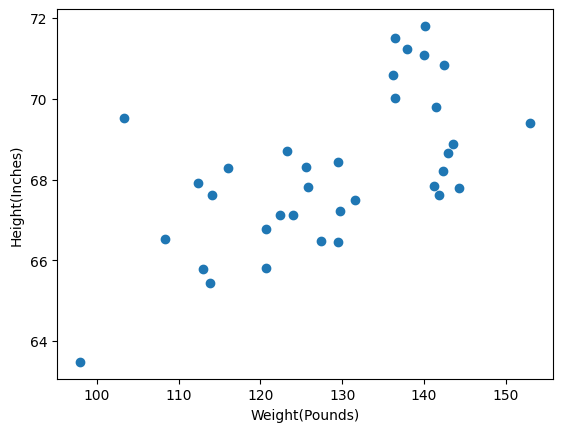

In [4]:
plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel('Weight(Pounds)')
plt.ylabel('Height(Inches)')

In [5]:
#Correlation
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.606995
Weight(Pounds),0.606995,1.000000


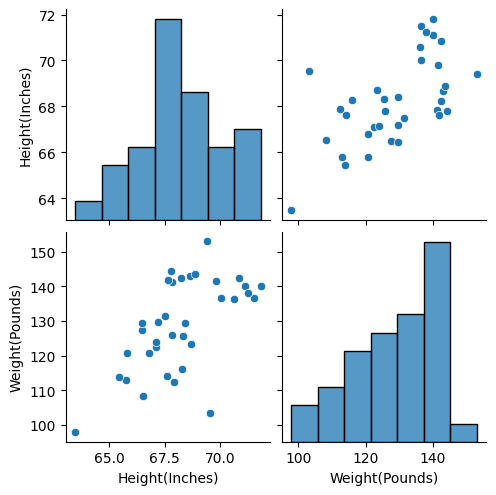

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
#Independent and dependent Features
x=df[['Weight(Pounds)']]  #Independent feature Should be a dataframe or 2D-Array
y=df['Height(Inches)']  #Dependendent feature can be series or 1D-Array

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)

In [24]:
x_test = scaler.transform(x_test)

In [25]:
#Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [28]:
regression=LinearRegression(n_jobs=-1)
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [33]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope:  [1.11028361]
Intercept: 68.20216961538462


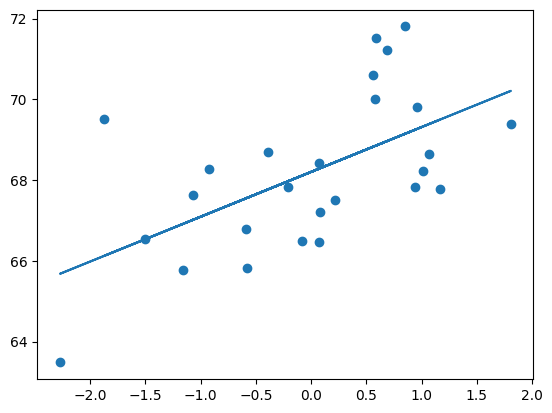

In [35]:
##Plot Training Data Best Fit Line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [37]:
'''Prediction of Test Data
1. Predicted Height = intercept + Coef_(Weight)
2. y_pred_test = 68.20216961538462 + 1.11028361(x_test)
'''

'Prediction of Test Data\n1. Predicted Height = intercept + Coef_(Weight)\n2. y_pred_test = 68.20216961538462 + 1.11028361(x_test)\n'

In [38]:
#Prediction for test data
y_pred=regression.predict(x_test)

In [44]:
#Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
R2Scr=r2_score(y_test,y_pred)
print("mean_squared_error:",mse)
print("mean_absolute_error:",mae)
print("Root Mean Squared Error:",rmse)
print("R2Square:",R2Scr)
'''Adjusted R Square
1 - [(1 - R2)(n - 1) / (n - p - 1)]
'''
Adj_R2Scr = 1 - (1 - R2Scr) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
print("Adjusted R Square:",Adj_R2Scr)

mean_squared_error: 1.507331201862534
mean_absolute_error: 1.097927570692442
Root Mean Squared Error: 1.2277341739409773
R2Square: 0.4807648378142426
Adjusted R Square: 0.4065883860734202


In [51]:
##OLS Linear Regression
import statsmodels.api as sm

In [52]:
model=sm.OLS(y_train,x_train).fit()

In [53]:
prediction=model.predict(x_test)

In [55]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.040
Method:                 Least Squares   F-statistic:                           0.006622
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                       0.936
Time:                        23:36:14   Log-Likelihood:                         -146.68
No. Observations:                  26   AIC:                                      295.4
Df Residuals:                      25   BIC:                                      296.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [68]:
#Prediction for new data
height=regression.predict(scaler.transform([[142]]))/12
print(height)
print(height*12)


[5.77532174]
[69.30386091]


c:\study\Machine-Learning-Ravz\mlenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
